In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle
pd.options.display.float_format = '{:.0f}'.format

In [2]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Hate'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [3]:
#create Count matrix
count = CountVectorizer()
count_train = count.fit_transform(X_train)
count_test = count.transform(X_test)

## Default NB

In [4]:
default_NB = GaussianNB(var_smoothing=1e-9)

In [5]:
# train classifier
print("training...")
default_NB.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_test_preds = default_NB.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [6]:
NB_metrics = {}
default_NB_precision = precision_score(y_test, default_NB_test_preds)
default_NB_recall = recall_score(y_test, default_NB_test_preds)
default_NB_macro_f1_score = f1_score(y_test, default_NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_precision))
print('Recall: {:.3}'.format(default_NB_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_macro_f1_score))

NB_metrics['Default NB'] = {'precision': default_NB_precision, 'recall': default_NB_recall, 
                            'macro_f1': default_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.306
Recall: 0.513
Macro F1 Score: 0.606


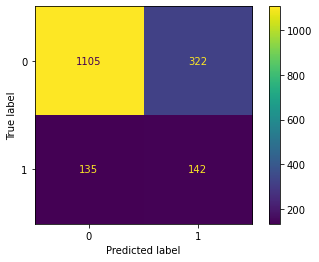

In [7]:
plot_confusion_matrix(default_NB, count_test.toarray(), y_test)

## Grid NB

In [8]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

grid_NB.fit(count_train.toarray(), y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.795, total=   1.0s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.794, total=   1.0s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.788, total=   1.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.791, total=   1.1s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.753, total=   1.1s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.812, total=   1.1s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.816, total=   1.1s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.766, total=   1.1s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.798, total=   1.1s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.571, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.563, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.502, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.560, total=   1.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.572, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.561, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.563, total=   1.0s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.560, total=   1.0s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.555, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.557, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.564, total=   1.0s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.545, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.562, total=   1.1s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.559, total=   1.1s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.627, total=   1.1s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.622, total=   1.1s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.604, total=   1.1s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.580, total=   1.1s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.612, total=   1.1s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.627, total=   1.1s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.618, total=   1.0s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.581, total=   1.2s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.612, total=   1.1s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.627, total=   1.1s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.616, total=   1.1s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.596, total=   1.1s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.581, total=   1.1s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.612, total=   1.0s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.616, total=   1.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.596, total=   1.0s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.581, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.612, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.627, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.616, total=   1.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.596, total=   1.1s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.612, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.627, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.616, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.596, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.581, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.612, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.627, total=   1.1s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.596, total=   1.0s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.581, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.612, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.627, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.616, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.596, total=   1.0s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.581, total=   1.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.627, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.616, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.596, total=   1.0s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.581, total=   1.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.612, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.627, total=   0.9s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.616, total=   1.0s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.6min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [9]:
#print best score obtained and the parameters which obtained it
print('F1 Score:', grid_NB.best_score_)
print('Best Hyperparameters:', grid_NB.best_params_)
print('Model object with best parameters: ')
print(grid_NB.best_estimator_)

F1 Score: 0.7897309589721664
Best Hyperparameters: {'var_smoothing': 0.8111308307896871}
Model object with best parameters: 
GaussianNB(var_smoothing=0.8111308307896871)


In [10]:
# train classifier
print("training...")
grid_NB.best_estimator_.fit(count_train.toarray(), y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_test_preds = grid_NB.best_estimator_.predict(count_test.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [11]:
grid_NB_precision = precision_score(y_test, NB_test_preds)
grid_NB_recall = recall_score(y_test, NB_test_preds)
grid_NB_macro_f1_score = f1_score(y_test, NB_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_NB_precision))
print('Recall: {:.3}'.format(grid_NB_recall))
print('Macro F1 Score: {:.3}'.format(grid_NB_macro_f1_score))

NB_metrics['Grid NB'] = {'precision': grid_NB_precision, 'recall': grid_NB_recall, 
                            'macro_f1': grid_NB_macro_f1_score}

Model evaluation metrics
Precision: 0.636
Recall: 0.668
Macro F1 Score: 0.791


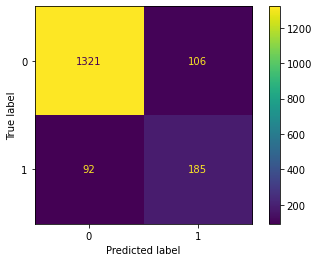

In [12]:
plot_confusion_matrix(grid_NB, count_test.toarray(), y_test)

## Default NB with POS

In [13]:
#create a column of pos tagged words in each tweet
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tweets = df.clean_text
tweet_tags = []

for t in tweets:
    tokens = nltk.word_tokenize(t)
    tags = nltk.pos_tag(tokens)
    new_text = []
    for word in tags:
        new_text.append(word[0] + "_" + word[1])
    tweet_tags.append(new_text)
    
tagged_tokens = []
for tweet in tweet_tags:
    sent = ' '.join(tweet)
    new_tokens = tokenizer.tokenize(sent)
    tagged_tokens.append(new_tokens)
    
df['pos_tags'] = tagged_tokens
df['pos_tags'] = df['pos_tags'].apply(lambda x: ' '.join(map(str, x)))

df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate,pos_tags
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0,i_NN just_RB found_VBD the_DT perfect_JJ renta...
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0,every_DT time_NN they_PRP discover_VBP anythin...
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0,ok_JJ time_NN to_TO write_VB code_NN bbl_NN ma...
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0,refined_VBN dessert_NN not_RB mkr_VB
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0,one_CD of_IN the_DT best_JJS things_NNS anyone...


In [14]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df['pos_tags'], df['Hate'], test_size=0.25, random_state=12)
                                                       
count_train_pos = count.fit_transform(X_train_pos)
count_test_pos = count.transform(X_test_pos)

In [15]:
default_NB_POS = GaussianNB(var_smoothing=1e-9)

In [16]:
# train classifier
print("training...")
default_NB_POS.fit(count_train_pos.toarray(), y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_NB_POS_test_preds = default_NB_POS.predict(count_test_pos.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [17]:
default_NB_POS_precision = precision_score(y_test_pos, default_NB_POS_test_preds)
default_NB_POS_recall = recall_score(y_test_pos, default_NB_POS_test_preds)
default_NB_POS_macro_f1_score = f1_score(y_test_pos, default_NB_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_NB_POS_precision))
print('Recall: {:.3}'.format(default_NB_POS_recall))
print('Macro F1 Score: {:.3}'.format(default_NB_POS_macro_f1_score))

NB_metrics['Default NB with POS'] = {'precision': default_NB_POS_precision, 'recall': default_NB_POS_recall, 
                            'macro_f1': default_NB_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.322
Recall: 0.469
Macro F1 Score: 0.614


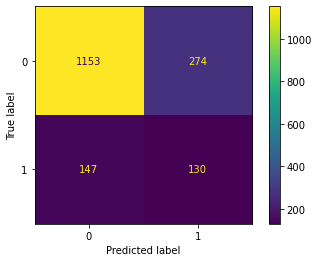

In [18]:
plot_confusion_matrix(default_NB_POS, count_test_pos.toarray(), y_test_pos)

## Grid NB with POS

In [19]:
grid_NB = GaussianNB()

grid_search_params = {'var_smoothing': np.logspace(0,-9, num=100)}
POS_grid_NB = GridSearchCV(grid_NB, grid_search_params, cv=5, scoring='f1_macro', verbose=3)

POS_grid_NB.fit(count_train_pos.toarray(), y_train_pos)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.491, total=   1.6s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.534, total=   1.5s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.571, total=   1.4s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.575, total=   1.5s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.475, total=   1.5s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.682, total=   1.5s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.702, total=   1.5s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.692, total=   1.4s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.706, total=   1.5s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[CV] ... var_smoothing=0.08111308307896872, score=0.550, total=   1.4s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.535, total=   1.4s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.477, total=   1.4s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.518, total=   1.4s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.561, total=   1.4s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.550, total=   1.4s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .... var_smoothing=0.0657933224657568, score=0.539, total=   1.4s
[CV] var_smoothing=0.0657933224657568 ................................
[CV] .

[CV] .. var_smoothing=0.008111308307896872, score=0.508, total=   1.4s
[CV] var_smoothing=0.008111308307896872 ..............................
[CV] .. var_smoothing=0.008111308307896872, score=0.520, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.509, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.512, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.465, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.501, total=   1.4s
[CV] var_smoothing=0.006579332246575682 ..............................
[CV] .. var_smoothing=0.006579332246575682, score=0.512, total=   1.4s
[CV] var_smoothing=0.005336699231206307 ..............................
[CV] .

[CV] . var_smoothing=0.0006579332246575676, score=0.554, total=   1.5s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.539, total=   1.5s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.566, total=   1.4s
[CV] var_smoothing=0.0006579332246575676 .............................
[CV] . var_smoothing=0.0006579332246575676, score=0.547, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.550, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.567, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] . var_smoothing=0.0005336699231206307, score=0.544, total=   1.4s
[CV] var_smoothing=0.0005336699231206307 .............................
[CV] .

[CV] . var_smoothing=6.579332246575683e-05, score=0.604, total=   1.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.617, total=   1.4s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.627, total=   1.6s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.624, total=   1.5s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.607, total=   1.6s
[CV] var_smoothing=5.3366992312063123e-05 ............................
[CV]  var_smoothing=5.3366992312063123e-05, score=0.604, total=   1.5s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] . var_smoothing=4.328761281083062e-05, score=0.617, total=   1.6s
[CV] var_smoothing=4.328761281083062e-05 .............................
[CV] .

[CV] . var_smoothing=5.336699231206313e-06, score=0.624, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.607, total=   1.3s
[CV] var_smoothing=5.336699231206313e-06 .............................
[CV] . var_smoothing=5.336699231206313e-06, score=0.604, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.617, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.627, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.624, total=   1.3s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] . var_smoothing=4.328761281083053e-06, score=0.607, total=   1.4s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV] .

[CV]  var_smoothing=4.3287612810830526e-07, score=0.617, total=   1.5s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.627, total=   1.5s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.624, total=   1.5s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.607, total=   1.6s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV]  var_smoothing=4.3287612810830526e-07, score=0.604, total=   1.6s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.617, total=   1.6s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  var_smoothing=3.5111917342151277e-07, score=0.627, total=   1.6s
[CV] var_smoothing=3.5111917342151277e-07 ............................
[CV]  

[CV]  var_smoothing=4.3287612810830526e-08, score=0.607, total=   1.4s
[CV] var_smoothing=4.3287612810830526e-08 ............................
[CV]  var_smoothing=4.3287612810830526e-08, score=0.604, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.617, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.627, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.624, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.607, total=   1.4s
[CV] var_smoothing=3.5111917342151277e-08 ............................
[CV]  var_smoothing=3.5111917342151277e-08, score=0.604, total=   1.4s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .

[CV]  var_smoothing=3.5111917342151273e-09, score=0.627, total=   1.4s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.624, total=   1.4s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.607, total=   1.5s
[CV] var_smoothing=3.5111917342151273e-09 ............................
[CV]  var_smoothing=3.5111917342151273e-09, score=0.604, total=   1.5s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.617, total=   1.4s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.627, total=   1.4s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] . var_smoothing=2.848035868435805e-09, score=0.624, total=   1.4s
[CV] var_smoothing=2.848035868435805e-09 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.3min finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

In [20]:
# train classifier
print("training...")
POS_grid_NB.best_estimator_.fit(count_train_pos.toarray(), y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
NB_grid_POS_test_preds = POS_grid_NB.best_estimator_.predict(count_test_pos.toarray())
print("complete.")

training...
complete.
predicting...
complete.


In [21]:
NB_grid_pos_precision = precision_score(y_test_pos, NB_grid_POS_test_preds)
NB_grid_pos_recall = recall_score(y_test_pos, NB_grid_POS_test_preds)
NB_grid_POS_macro_f1_score = f1_score(y_test_pos, NB_grid_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(NB_grid_pos_precision))
print('Recall: {:.3}'.format(NB_grid_pos_recall))
print('Macro F1 Score: {:.3}'.format(NB_grid_POS_macro_f1_score))

NB_metrics['Grid Search NB with POS'] = {'precision': NB_grid_pos_precision, 'recall': NB_grid_pos_recall, 
                        'macro_f1': NB_grid_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.691
Recall: 0.412
Macro F1 Score: 0.722


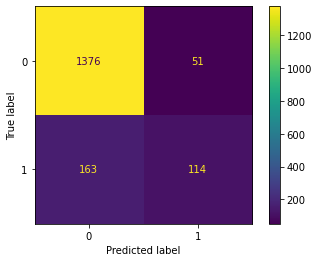

In [22]:
plot_confusion_matrix(POS_grid_NB.best_estimator_, count_test_pos.toarray(), y_test_pos)

In [23]:
#compare parameters
results = pd.DataFrame.from_dict(NB_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\NB_count_results.csv",
               index=True)

In [24]:
pd.options.display.float_format = '{:.4f}'.format
results

,precision,recall,macro_f1
Default NB,0.3060,0.5126,0.6060
Grid NB,0.6357,0.6679,0.7908
Default NB with POS,0.3218,0.4693,0.6137
Grid Search NB with POS,0.6909,0.4116,0.7218
